---
# data pps

In [160]:
import os
import json
from typing import List, Union

def load_jsonl(fpath:str) -> List[Union[dict, list]]:
    with open(fpath, 'r') as f:
        data = f.readlines()
    data = [json.loads(x) for x in data]
    return data

In [161]:
data = load_jsonl('./rlhf-data.jsonl')

In [162]:
# 인덱스 0 추가
data = [{}] + data

In [163]:
data[0], data[1]

({},
 {'instruction': '건강을 유지하기 위한 세 가지 팁을 알려주세요.',
  'input': '',
  'output': ['세 가지 팁은 아침식사를 꼭 챙기며, 충분한 수면을 취하고, 적극적으로 운동을 하는 것입니다.',
   '충분한 수면, 규칙적인 운동 및 영양가 있는 식사를 일정 시간 포함하면서 스트레스를 줄이고 마음을 편안하게 유지하는 것이 중요합니다.',
   '운동을 해서 칼로리를 태우고, 충분한 수분을 마시며, 제대로 영양소를 섭취하세요.']})

In [164]:
len(data)

49601

In [165]:
# load chat-gpt gen data

fpath = './rlhf-data-gpt-3.5-turbo.txt'
with open(fpath, 'r') as f:
    aa = f.readlines()

In [166]:
len(aa)

248224

In [167]:
aa[-4]

'>>>49620\n'

In [168]:
# 빈 라인 처리
xx = map(lambda x: x.strip(), aa)
xx = list(filter(lambda x: x!='', xx))

In [169]:
len(xx)

181852

In [170]:
import re
from tqdm.auto import tqdm

In [171]:
# 정규식 패턴
p = re.compile(r'>>>(\d+)\n')

# 다시 텍스트로 병합
tt = '\n'.join(xx)

In [172]:
# 중복 인덱스 체크 
from collections import Counter

cc= Counter(p.findall(tt))
cc.most_common()

[('32', 21),
 ('1', 3),
 ('6', 3),
 ('7', 2),
 ('8', 2),
 ('9', 2),
 ('12', 2),
 ('14', 2),
 ('15', 2),
 ('23', 2),
 ('81', 2),
 ('238', 2),
 ('314', 2),
 ('353', 2),
 ('410', 2),
 ('522', 2),
 ('595', 2),
 ('1939', 2),
 ('3000', 2),
 ('8611', 2),
 ('8655', 2),
 ('9641', 2),
 ('9646', 2),
 ('13455', 2),
 ('20555', 2),
 ('44455', 2),
 ('45235', 2),
 ('2', 1),
 ('3', 1),
 ('4', 1),
 ('5', 1),
 ('10', 1),
 ('11', 1),
 ('13', 1),
 ('16', 1),
 ('17', 1),
 ('18', 1),
 ('19', 1),
 ('20', 1),
 ('21', 1),
 ('22', 1),
 ('24', 1),
 ('25', 1),
 ('26', 1),
 ('27', 1),
 ('28', 1),
 ('29', 1),
 ('30', 1),
 ('31', 1),
 ('33', 1),
 ('34', 1),
 ('35', 1),
 ('36', 1),
 ('37', 1),
 ('38', 1),
 ('39', 1),
 ('40', 1),
 ('41', 1),
 ('42', 1),
 ('43', 1),
 ('44', 1),
 ('45', 1),
 ('46', 1),
 ('47', 1),
 ('48', 1),
 ('49', 1),
 ('50', 1),
 ('51', 1),
 ('52', 1),
 ('53', 1),
 ('54', 1),
 ('55', 1),
 ('56', 1),
 ('57', 1),
 ('58', 1),
 ('59', 1),
 ('60', 1),
 ('61', 1),
 ('62', 1),
 ('63', 1),
 ('64', 1),
 ('65'

In [173]:
res = [{'idx':i} for i in range(len(data))]
# res = {k:v for k, v in enumerate(res)}
prev_idx = 0
prev_end = 0
i = 0
for m in tqdm(p.finditer(tt)):
    # print(m)
    curr_idx = int(m.groups()[0])
    if curr_idx > len(res): continue
    
    
    if prev_idx>0:
        pr = res[prev_idx].get('answer', [])
        cont = tt[prev_end:m.start()] if i < len(res) -1 else tt[prev_end:]
        # pps 및 필터 여기에
        # ...
        res[prev_idx].update({'answer': pr + [cont]})
    
    prev_idx = curr_idx
    prev_end = m.end()
    i += 1

0it [00:00, ?it/s]

In [174]:
data[104]

{'instruction': '8자로 된 비밀번호를 생성하십시오.',
 'input': '',
 'output': ['vZ@T8A9C', 'alphabet/list(dogan-3)', 'B9H#2G7']}

In [175]:
len(data)

49601

In [176]:
# 인덱스 중복 체크
dup = list(filter(lambda x: x.get('answer', False) and x['answer'].__len__()>1, res))
dup

[{'idx': 1,
  'answer': ['건강을 유지하기 위한 세 가지 팁을 알려주세요.\n- 충분한 수면을 취하세요.\n- 규칙적인 운동을 하세요.\n- 균형 잡힌 식사를 하세요.\n',
   '2\n3\n4\n',
   '']},
 {'idx': 6,
  'answer': ['홀수 중 하나를 밝히세요.\n7\n',
   '### Explanation:\n주어진 목록 [3, 4, 7, 8, ?]에서 누락된 숫자를 찾기 위해서는 패턴이나 규칙을 파악해야 합니다. 이 목록에 있는 숫자는 3과 4에서 시작해 각각 1씩 증가한 후 7, 8로 이어집니다. 이에 따라 누락된 숫자는 5입니다.\n',
   '### Explanation:\nGiven the input array [5, 4, 10, 3, 6], the second largest number in the array is 6.\n---\n']},
 {'idx': 7,
  'answer': ['다음 분수가 1/4에 해당하는 이유를 설명하세요.\n4/16은 1/4에 해당합니다. 이유는 간단합니다. 4/16에서 4와 16을 모두 4로 나누면 각각 1과 4/4가 됩니다. 즉, 4/4는 분수 안에 있나 없나 관계없이 1로, 4/16은 이를 4로 나눴기 때문에 1/4로 계산됩니다.\n',
   '### Explanation:\n2, 7, 11, 14 중에서 가장 큰 소수는 7입니다.\n---\n']},
 {'idx': 8,
  'answer': ['중요한 진로 결정을 내려야 하는 주인공의 이야기를 3인칭 내레이션으로 단편 소설을 쓰세요.\n성장하기 위해 중요한 진로 결정을 해야 하는 대학생 지수는, 자신이 하고 싶은 것과 가장 적성이 맞는 것이 무엇인지 고민합니다. 진로 상담과 여러 자기 분석을 통한 깨달음 끝에 지수는 본인의 미래를 찾게 됩니다. 결국 이러한 고민 끝에 지수는 자신이 적성에 맞고 좋아하는 것이 더욱 중요하다는 것을 깨닫고 자신만의 그룹을 만들어 건강 전문 지식의 가치를 이어가는 자세를 가져갑니다.

In [177]:
data[24850]

{'instruction': '음표가 주어지면 음계의 이름을 식별합니다.',
 'input': 'A B C# D E F# G#',
 'output': ['입력된 음계는 다음과 같습니다: A major, B major, C# minor, D major, E major, F# major, G# major',
  "'A장조', 'C#단조', 'D장조'와 같이 각 조에 해당하는 음계의 이름을 식별할 수 있습니다.",
  'C#은 도, D#은 레, F#는 미, G#은 솔입니다.']}

In [178]:
res[24850]

{'idx': 24850,
 'answer': ['음표가 주어지면 음계의 이름을 식별합니다.\n### Input:\nA B C# D E F# G#\n### Output:\nA 메이저\n']}

In [179]:
[(x['idx'], len(x['answer'])) for x in dup]

[(1, 3),
 (6, 3),
 (7, 2),
 (8, 2),
 (9, 2),
 (12, 2),
 (14, 2),
 (15, 2),
 (23, 2),
 (32, 21),
 (81, 2),
 (238, 2),
 (314, 2),
 (353, 2),
 (410, 2),
 (522, 2),
 (595, 2),
 (1939, 2),
 (3000, 2),
 (8611, 2),
 (8655, 2),
 (9641, 2),
 (9646, 2),
 (13455, 2),
 (20555, 2),
 (44455, 2),
 (45235, 2)]

In [180]:
flist = ['세요.', '시오.', '가요.', '?', '세요', '시오', '가요?', '가?']  # 질문 반복 제거
merged = [None] * len(data)
i = -1
for a,b in tqdm(zip(data, res)):
    i+=1
    if i == 0:
        continue
    fted = b.get('answer', [None])[0]
    b['instruction'] = a.get('instruction','')
    b['input'] = a.get('input','')
    b['output'] = a.get('output',[])
    if fted is None:
        b['pps'] = ''
        merged[i] = xx
        continue

    # pps text
    tmp = fted.split('\n')
    willberemoved = False
    if tmp[0].strip() == '': tmp = tmp[1:]
    if len(tmp) == 0: tmp = ['']
    if tmp[0].find('>>>') != -1: willberemoved = True
    elif tmp[0].find('###') != -1: willberemoved = True
    for x in flist:
        if tmp[0].strip().endswith(x):
            willberemoved = True
            break

    if willberemoved:
        tmp = '\n'.join(tmp[1:]).strip()
    else:
        tmp = '\n'.join(tmp).strip()

    tmp = tmp.replace('>>>', '')
    tmp = tmp.replace('>>>.', '')
    tmp = tmp.replace('###', '')

    b['pps'] = tmp

    xx = b.copy()
    if tmp != '':
        xx['output'].append(tmp)
    merged[i] = xx

0it [00:00, ?it/s]

In [181]:
with open('./check.json', 'w') as f:
    ccc = [{'idx': x['idx'],'instruction': x['instruction'], 'input':x['input'], 'pps': x['pps']} for x in merged[1:]]
    json.dump(ccc, f, ensure_ascii=False, indent=2)

In [182]:
with open('./rlhf-1.0.json', 'w') as f:
    ccc = [{'idx': x['idx'],'instruction': x['instruction'], 'input':x['input'], 'output': x['output']} for x in merged[1:]]
    json.dump(ccc, f, ensure_ascii=False, indent=2)

In [184]:
import pandas as pd
df = pd.DataFrame({
    'nout': [len(x['output']) for x in merged[1:]]
})

<Axes: >

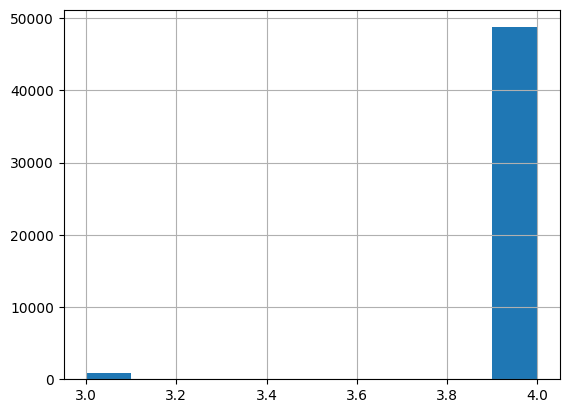

In [185]:
df.nout.hist()